In [47]:
import numpy as np
# import torch
import matplotlib.pyplot as plt

In [48]:
# lam_U1 = lambda t:(np.sin(t*2*np.pi), np.sin(t*2*np.pi)*np.sin(t*2*np.pi))
# lam_U2 = lambda t:(np.cos(t*2*np.pi), np.sin(t*2*np.pi)*np.sin(t*2*np.pi)*np.cos(t*2*np.pi))

lam_U11 = lambda t:(np.sin(t*2*np.pi), 1)

lam_U12 = lambda t:(np.cos(t*2*np.pi),1)

lam_U21 = lambda t:(1, np.cos(t*2*np.pi))

lam_U22 =lambda t:(1, np.sin(t*2*np.pi))

#lam = lambda t:(np.sin(t), np.cos(t))

#print(lam(2))
# U0 = np.array([ [1.0, 1.0, 0.5],
#          [-1.5, 1.0, 1.0],
#          [1.0, -1.5, 1.0]])

# U1 = np.array([ [-0.5,1.0, 0.1],
#          [1.0, 0.5, 1.0],
#          [0.10, 0.8, -0.5]])


U0 = np.array([ [1.0, 1.0, 1.0],
         [1.0, 1.0, 1.0],
         [1.0, 1.0, 1.0]])

U1 = np.array([ [1,1.0, 1.0],
         [1.0, 1.0, 1.0],
         [1.0, 1.0, 1.0]])


U = [U0, U1]
dims = [2,2]
N = 1000
N_test = 50
N_sample_max = 4000
time_points_train = np.sort(np.random.rand(N))#np.linspace(0, 1, N)
# time_points_train = np.linspace(0, 1, N)

time_points_train[0] = 0.00
time_points_test = np.sort(np.random.rand(N_test))

time_all = np.concatenate((time_points_train, time_points_test))


In [49]:
def unique_recoding(data_array):
    # colum_name = 'movieId'
    unique_key = np.sort(np.unique(data_array))
    recode_dict = {key:id for id,key in enumerate(unique_key)}

    new_column = np.array(list(map(lambda x:recode_dict[x], data_array)))
    # data[colum_name] = new_column
    print('ndim of %d'%(len(new_column)))
    return recode_dict, new_column

recode_dict_globle,_ = unique_recoding(time_all)

ndim of 1050


In [50]:
noise = 0.01

train_ind = []
train_y = []
train_time_ind = []
train_time = []


test_ind = []
test_y = []
test_time_ind = []
test_time = []

t_train = 0
while True:

    if t_train>=N:
        break

    n_sample = np.random.randint(2,4)
    
    T_train = time_points_train[t_train]
    lam_traj_U1 = [np.array(lam_U11(T_train)),np.array(lam_U12(T_train))]
    lam_traj_U2 = [np.array(lam_U21(T_train)),np.array(lam_U22(T_train))]
    

    for sample in range(n_sample):
        i = np.random.randint(0,dims[0])
        j = np.random.randint(0,dims[1])
        
        # lam_t = np.array( lam(time_points_train[t_train]) )
        val = np.sum(lam_traj_U1[i]*lam_traj_U2[j]) + np.random.randn()*noise
        # val = np.sum(U[0][i,:]*U[1][j,:]) + np.random.randn()*noise

        train_ind.append([i,j])
        train_y.append(val)
        train_time.append(T_train)
        train_time_ind.append(recode_dict_globle[T_train])

    t_train = t_train + 1


t_test = 0
while True:
    
    if t_test>=N_test:
        break

    n_sample = np.random.randint(1,4)
    T_test = time_points_test[t_test]
    
    lam_traj_U1 = [np.array(lam_U11(T_test)),np.array(lam_U12(T_test))]
    lam_traj_U2 = [np.array(lam_U21(T_test)),np.array(lam_U22(T_test))]

    for sample in range(n_sample):
        i = np.random.randint(0,dims[0])
        j = np.random.randint(0,dims[1])
        
    
        val = np.sum(lam_traj_U1[i]*lam_traj_U2[j]) + np.random.randn()*noise
        # val = np.sum(U[0][i,:]*U[1][j,:]) + np.random.randn()*noise

        test_ind.append([i,j])
        test_y.append(val)
        test_time.append(T_test)
        test_time_ind.append(recode_dict_globle[T_test])

    t_test = t_test + 1



In [51]:
data_save = {}
data_save['ndims'] = dims
data_save['num_node'] = np.sum(data_save['ndims'])
data_save['data'] = []
data_save['time_uni'] = np.sort(np.unique(time_all)) # sorted unique timestamps of all data
data_save['time_id_table'] = recode_dict_globle # timestamp-disct id map table

fold_data = {}

# prepare train data
tr_sort_id = np.argsort(np.squeeze(np.array(train_time)))
fold_data['tr_ind'] = np.array(train_ind)[tr_sort_id].astype(int)
fold_data['tr_y'] = np.array(train_y)[tr_sort_id].astype(float)
fold_data['tr_T'] = np.array(train_time)[tr_sort_id].astype(float)

# prepare test data
te_sort_id = np.argsort(np.squeeze(np.array(test_time)))
fold_data['te_ind'] = np.array(test_ind)[te_sort_id].astype(int)
fold_data['te_y'] = np.array(test_y)[te_sort_id].astype(float)
fold_data['te_T'] = np.array(test_time)[te_sort_id].astype(float)

fold_data['tr_T_disct'] = np.array(list(map(lambda x:recode_dict_globle[x], np.squeeze(fold_data['tr_T'])))).astype(int)
fold_data['te_T_disct'] = np.array(list(map(lambda x:recode_dict_globle[x], np.squeeze(fold_data['te_T'])))).astype(int)

data_save['data'].append(fold_data)
file_name = '../simulation_CP_r2.npy'
np.save(file_name, data_save)



In [52]:
fold_data['tr_y'].shape

(2512,)

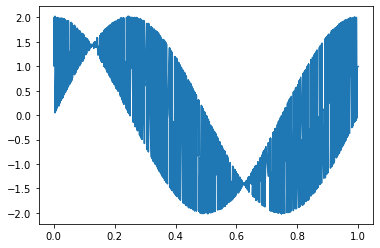

In [53]:
plt.plot(fold_data['tr_T'],train_y)